In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [169]:
properties = pd.read_csv('../data/properati-AR-2017-08-01-properties-sell.csv', low_memory=False)
properties['created_on'] = pd.to_datetime(properties['created_on'], format='%Y-%m')

In [4]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187482 entries, 0 to 187481
Data columns (total 27 columns):
id                            187482 non-null object
created_on                    187482 non-null object
operation                     187482 non-null object
property_type                 187482 non-null object
place_name                    187447 non-null object
place_with_parent_names       187482 non-null object
country_name                  187482 non-null object
state_name                    187482 non-null object
geonames_id                   158318 non-null float64
lat-lon                       118761 non-null object
lat                           118761 non-null float64
lon                           118761 non-null float64
price                         154443 non-null float64
currency                      154441 non-null object
price_aprox_local_currency    154443 non-null float64
price_aprox_usd               154443 non-null float64
surface_total_in_m2           12502

In [167]:
properties.describe()

/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.583180e+05,118761.000000,118761.000000,1.544430e+05,1.544430e+05,1.544430e+05,125027.000000,152420.000000,1.050240e+05,1.316650e+05,14294.000000,80320.000000,1.752000e+04
mean,3.560821e+06,-34.775631,-59.207578,4.402848e+05,4.298946e+06,2.436423e+05,297.023707,146.026630,1.980865e+03,6.125528e+03,14.584301,3.087276,4.872184e+03
std,3.442029e+05,2.071562,2.293300,1.915257e+06,6.870371e+06,3.893775e+05,2072.795972,2617.149603,4.624897e+03,2.567322e+04,103.573137,1.754502,1.105076e+05
min,3.427208e+06,-54.833014,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,6.275958e-02,1.000000,1.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6.948895e+06,4.545843,-40.149218,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,987897.000000,1.271027e+06,4.000000e+06,3150.000000,40.000000,1.000150e+07


In [124]:
properties.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,93.0,360.360360,1290.322581,NaN,NaN,NaN,http://www.properati.com.ar/udh_venta_casa_mer...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...
1,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,220.0,1000.000000,1000.000000,NaN,NaN,NaN,http://www.properati.com.ar/20hi_venta_casa_me...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...
2,e06d6f864a0b91346594da4d27ceddcef0947ea6,2012-11-01,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0199509,-57.5265733",...,42.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/336o_venta_departa...,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,DTO. 2 AMB. C/ VISTA PLENA AL MAR,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...
3,a07927207d2a03de5f4ba7fd76f670d6285a3315,2012-11-26,sell,house,Sierra de los Padres,|Argentina|Buenos Aires Interior|General Pueyr...,Argentina,Buenos Aires Interior,3427958.0,"-37.9511934894,-57.7752885836",...,265.0,NaN,NaN,NaN,6.0,NaN,http://www.properati.com.ar/47hc_venta_terreno...,PROPIEDAD DE CATEGORIA CUENTA CON: 4 DORMITOR...,CHALET EN VENTA,https://thumbs4.properati.com/9/DA4GMdxXrthh5z...
4,9446052c949050359fb08b9f1ba83ba2eaa20c99,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6544492346,-58.4895603251",...,103.0,616.666667,1796.116505,NaN,5.0,NaN,http://www.properati.com.ar/4m4m_venta_casa_ma...,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA,https://thumbs4.properati.com/6/DsNJjCb5_zIPV0...


In [12]:
#todas las propiedades son de Argentina?
properties[properties['country_name'] != 'Argentina'].shape

(0, 27)

In [22]:
#cantidad de valores nulos por columna
print(properties.isnull().sum())

id                                 0
created_on                         0
operation                          0
property_type                      0
place_name                        35
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    29164
lat-lon                        68721
lat                            68721
lon                            68721
price                          33039
currency                       33041
price_aprox_local_currency     33039
price_aprox_usd                33039
surface_total_in_m2            62455
surface_covered_in_m2          35062
price_usd_per_m2               82458
price_per_m2                   55817
floor                         173188
rooms                         107162
expenses                      169962
properati_url                      0
description                        9
title                              0
image_thumbnail                 4668
d

In [33]:
#cantidad de publicaciones por lugar
properties_with_price['place_name'].value_counts()

Mar del Plata                     12428
Córdoba                            8663
Rosario                            6174
Nordelta                           4494
Tigre                              4388
Ramos Mejía                        3455
Palermo                            3298
Belgrano                           3276
Pilar                              2890
Caballito                          2565
Olivos                             2394
Pinamar                            1995
La Plata                           1932
Recoleta                           1889
Capital Federal                    1800
Morón                              1752
Villa Crespo                       1747
Ituzaingó                          1720
Villa Urquiza                      1701
Flores                             1691
Martínez                           1689
Lomas de Zamora                    1689
San Isidro                         1546
Haedo                              1514
Benavidez                          1482


In [34]:
#Y por provincia
properties_with_price['state_name'].value_counts()

Capital Federal                 39480
Bs.As. G.B.A. Zona Norte        37771
Bs.As. G.B.A. Zona Oeste        17932
Buenos Aires Costa Atlántica    17918
Bs.As. G.B.A. Zona Sur          15020
Córdoba                         11724
Santa Fe                         7004
Buenos Aires Interior            3330
Mendoza                           645
Misiones                          626
Neuquén                           502
Corrientes                        498
Río Negro                         442
San Luis                          331
Entre Ríos                        248
Tucumán                           223
Chubut                            196
Salta                             129
Catamarca                         125
La Pampa                           74
Tierra Del Fuego                   69
Chaco                              60
Santa Cruz                         32
Formosa                            30
Jujuy                              16
San Juan                            8
La Rioja    

## Donde se encuentran las propiedades mas caras en cuanto a precio?

En principio deberiamos tener solo en cuenta las propiedas que tienen precio debido a que son las propiedas que nos ayudaran a estimar el valor de nuevas propiedades

In [32]:
properties_with_price = properties[properties['price'].notnull()]
properties_with_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154443 entries, 0 to 187480
Data columns (total 27 columns):
id                            154443 non-null object
created_on                    154443 non-null object
operation                     154443 non-null object
property_type                 154443 non-null object
place_name                    154409 non-null object
place_with_parent_names       154443 non-null object
country_name                  154443 non-null object
state_name                    154443 non-null object
geonames_id                   128230 non-null float64
lat-lon                       97525 non-null object
lat                           97525 non-null float64
lon                           97525 non-null float64
price                         154443 non-null float64
currency                      154441 non-null object
price_aprox_local_currency    154443 non-null float64
price_aprox_usd               154443 non-null float64
surface_total_in_m2           105514 n

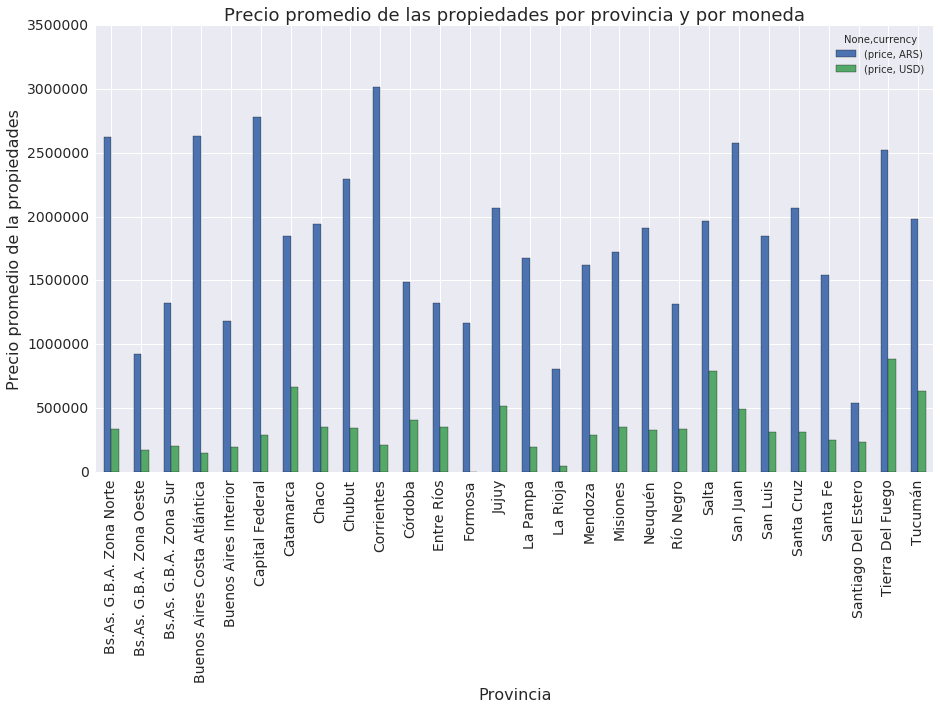

In [120]:
properties_with_price.loc[properties_with_price['currency'].isin(['ARS','USD'])\
                          ,['state_name','price', 'currency']]\
.groupby(['state_name','currency']).mean().unstack()\
    .plot(kind='bar', rot=90, figsize=(15,8) , stacked=False, fontsize=14);
plt.title('Precio promedio de las propiedades por provincia y por moneda', fontsize=18);
plt.xlabel('Provincia', fontsize=16);
plt.ylabel('Precio promedio de la propiedades', fontsize=16);

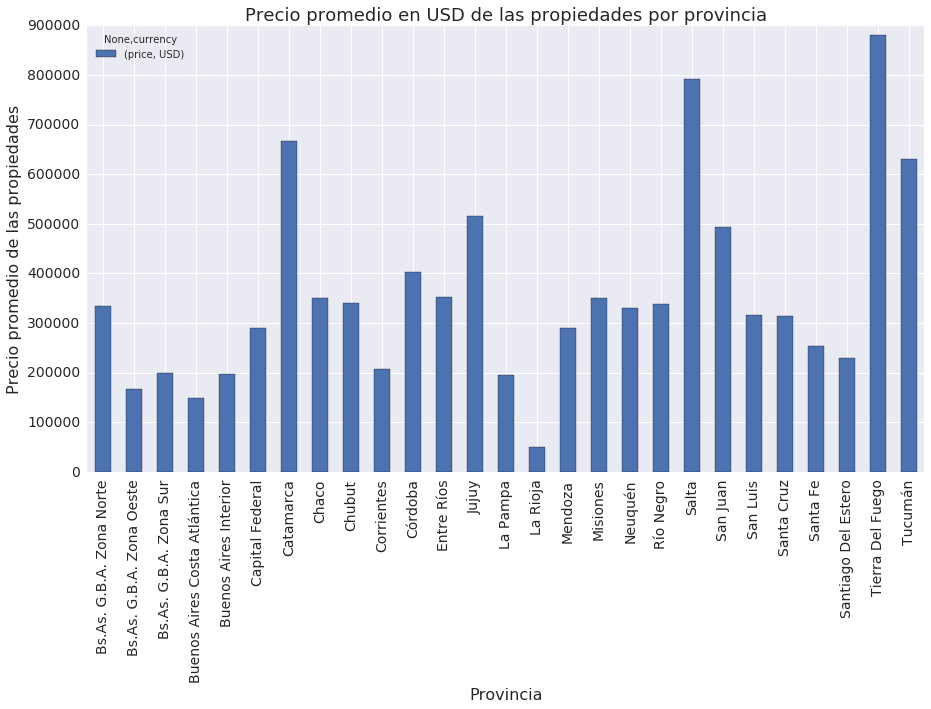

In [121]:
properties_with_price.loc[properties_with_price['currency'] == 'USD'\
                          ,['state_name','price', 'currency']]\
.groupby(['state_name','currency']).mean().unstack()\
    .plot(kind='bar', rot=90, figsize=(15,8), fontsize=14);
plt.title('Precio promedio en USD de las propiedades por provincia', fontsize=18);
plt.xlabel('Provincia', fontsize=16);
plt.ylabel('Precio promedio de las propiedades', fontsize=16);

## Como varian los precios segun la fecha en que se publicaron?

In [161]:
def date_to_year_month(d):
    return str(d.year)+"-"+("%02d" % (d.month,))

properties['created_on'] = properties['created_on'].map(date_to_year_month)

properties_grouped_bycreatedon = properties.loc[properties['currency'] == 'USD',['state_name','price', 'created_on']]\
    .groupby(['created_on']).agg(['mean','count'])
    
#properties_grouped_bycreatedon.reset_index(inplace=True)
properties_grouped_bycreatedon.tail()

price       
                     mean  count
created_on                      
2017-04     292276.140960   9187
2017-05     240498.377048   9951
2017-06     258744.423567  11075
2017-07     256294.802556  46246
2017-08     218725.591346    208

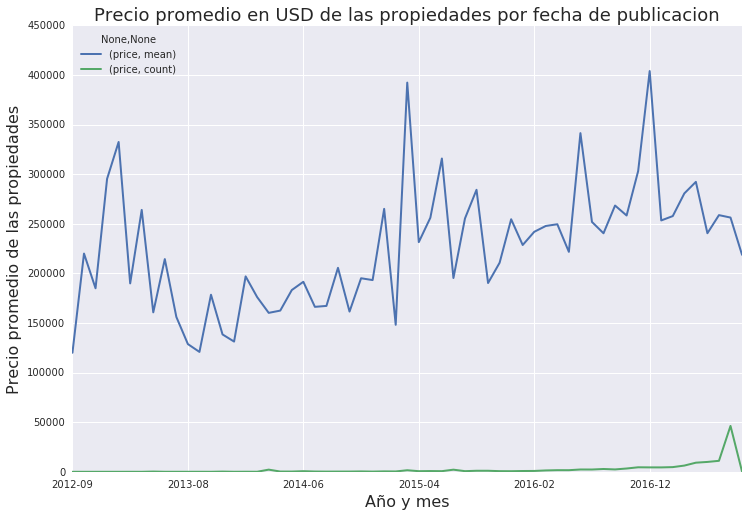

In [168]:
properties_grouped_bycreatedon.plot(rot=0, linewidth=2,figsize=(12,8));
plt.title('Precio promedio en USD de las propiedades por fecha de publicacion', fontsize=18);
plt.xlabel('Año y mes', fontsize=16);
plt.ylabel('Precio promedio de las propiedades', fontsize=16);

Podemos ver como en el ultimo año incrementaron la cantidad de publicaciones pero a su vez como disminuyo el precio promedio de las propiedades

## Existe alguna relacion entre el precio de la propiedad y la superficie total/cubierta en m2?
Creemos que por al menos en Capital Federal las propiedades que tienen una superficie descubierta son mas caras que las que no

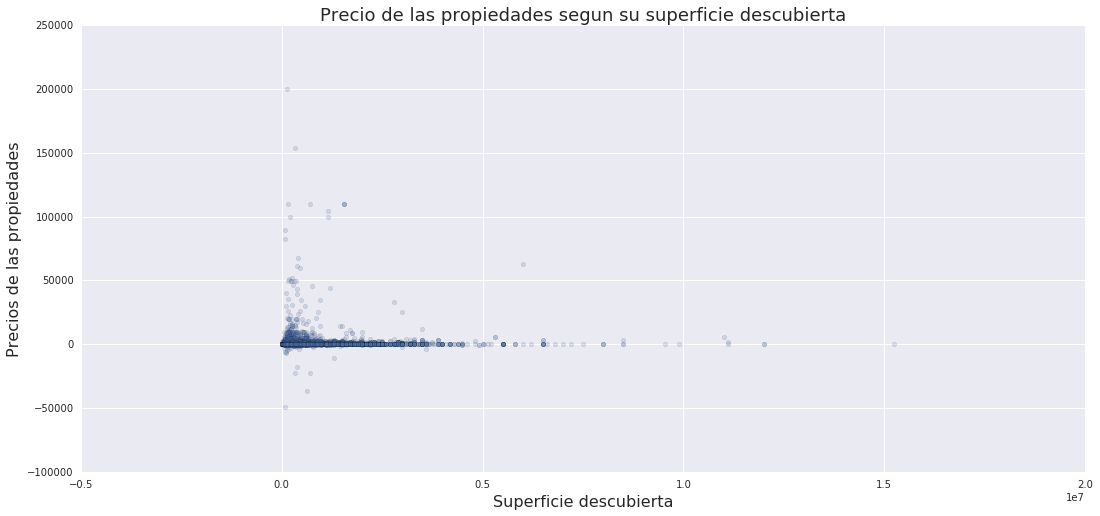

In [242]:
#agarro las propiedades que tienen tanto superficies cubiertas como totales
properties_with_price_and_surface = properties_with_price[properties_with_price['surface_total_in_m2'].notnull()]

properties_with_price_and_surface = properties_with_price_and_surface.assign(surface_discovered_in_m2 = \
    properties_with_price_and_surface['surface_total_in_m2']-properties_with_price_and_surface['surface_covered_in_m2'])

properties_with_price_and_surface.loc[properties_with_price_and_surface['currency'] == 'USD',\
   ['surface_total_in_m2','surface_covered_in_m2','surface_discovered_in_m2','price','price_per_m2']].plot\
    .scatter('price','surface_discovered_in_m2',alpha=0.20,figsize=(18,8));
plt.title('Precio de las propiedades segun su superficie descubierta', fontsize=18);
plt.xlabel('Superficie descubierta', fontsize=16);
plt.ylabel('Precios de las propiedades', fontsize=16);

No se ve ninguna relacion. Deberiamos comparar la superficie cubierta contra la total y ver que encontramos.

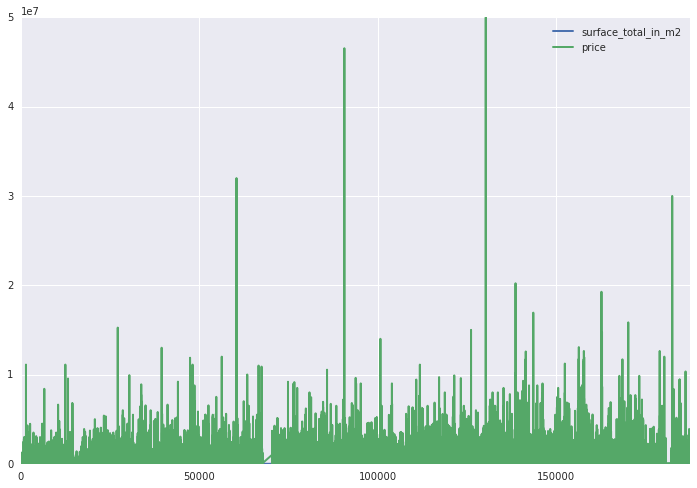

In [245]:
properties_with_price_and_surface.loc[:,['surface_total_in_m2','price']].plot(rot=0, \
                 linewidth=2,figsize=(12,8),label='United States')
#properties_with_price_and_surface['surface_covered_in_m2','price']